In [66]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [67]:
#1 Завантажте набір даних
file = pandas.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", sep=",",
encoding="utf8", engine='python')

In [68]:
file = file.drop(['link','old_price', 'Unnamed: 0'],  axis=1)
file['designer'] = file['designer'].replace(r'^.{3}\..*', value='No information',  regex=True) 
designers_split = [sorted(item.split('/')) for item in file['designer']]
file['designer'] = ['/'.join(item) for item in designers_split]

# Гіпотеза №1: Чи є залежність між ціною та кількістю меблів, які виготовляє дизайнер?

Нульова гіпотеза (H0): Немає залежності між ціною та кількістю меблів, які виготовляє дизайнер.

Альтернативна гіпотеза (H1): Є залежність між ціною та кількістю меблів, які виготовляє дизайнер.

In [69]:
#Разбиваем значения в колонке 'designer' на отдельные дизайнеры
file['designer'] =  file['designer'].str.split('/')

# Создаем новую таблицу с дубликатами для каждого дизайнера
data_expanded = file.explode('designer')

# Группировка данных по дизайнеру и подсчет количества мебели для каждого дизайнера
designer_furniture_count = data_expanded.groupby('designer')['item_id'].count().reset_index()
designer_furniture_count = designer_furniture_count.rename(columns={'item_id': 'furniture_count'})

# Объединение данных о количестве мебели с данными об исходной цене
merged_data = data_expanded.merge(designer_furniture_count, on='designer')

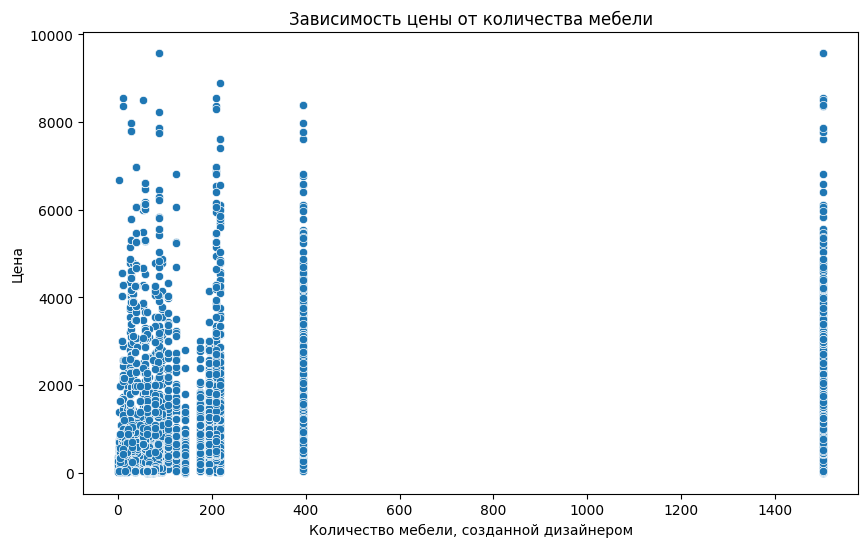

In [70]:
# Создание точечной диаграммы рассеяния для анализа зависимости
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='furniture_count', y='price')
plt.xlabel('Количество мебели, созданной дизайнером')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества мебели')
plt.show()

In [71]:
# Вычисляем корреляцию Пирсона
corr_coefficient, p_value = stats.pearsonr(merged_data['furniture_count'], merged_data['price'])
print(f"Коефіцієнт кореляції Пірсона: {corr_coefficient}")
print(f"P-значення: {p_value}")

Коефіцієнт кореляції Пірсона: -0.021965587631271117
P-значення: 0.10476959540935514


На основі аналізу даних і проведеного кореляційного аналізу, можна зробити такі висновки:
- За точковою діаграмою розсіювання не спостерігається чіткої лінійної залежності між ціною та кількістю виготовленої мебелі. 
- Коефіцієнт кореляції Пірсона близький до нуля, що свідчить про відсутність сильної лінійної залежності між цими двома змінними. 
- P-значення також високе, що також вказує на відсутність кореляції між двома змінними.

Отже, наші аналітичні результати не підтвердили альтернативну гіпотезу про наявність залежності між ціною та кількістю меблів, які виготовляє дизайнер. Відповідно, ми не маємо достатніх підстав відкидати нульову гіпотезу про відсутність такої залежності.
Отже нульова гіпотеза правильна.

# Гіпотеза №2: Чи є залежність між висотою та ціною?

Нульова гіпотеза (H0): Немає залежності між висотою та ціною.

Альтернативна гіпотеза (H1): Є залежність між висотою та ціною.

In [72]:
# Удалить строки с NaN значениями
file = file.dropna(subset=['height', 'price'])

In [73]:
# Розрахунок коефіцієнта кореляції та p-value
corr, p_value = pearsonr(file['height'], file['price'])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.2786209277879185
P-value: 1.954456679279467e-49


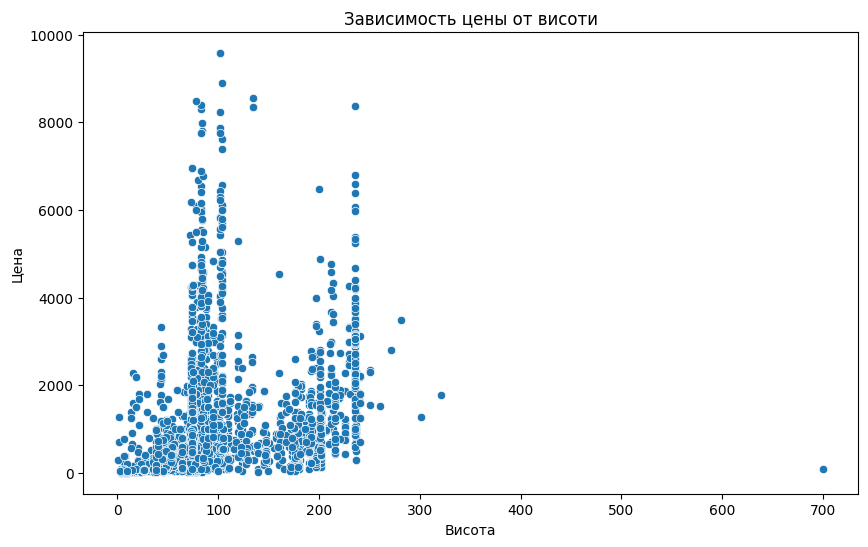

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(file, x='height', y='price')
plt.xlabel('Висота')
plt.ylabel('Цена')
plt.title('Зависимость цены от висоти')
plt.show()

На основі аналізу даних і проведеного кореляційного аналізу, можна зробити такі висновки:
- За точковою діаграмою розсіювання спостерігається деяка тенденція до зростання ціни разом із збільшенням висоти меблів, проте ця залежність може бути неоднорідною.
- Коефіцієнт кореляції Пірсона вказує на існування позитивної кореляції між двома змінними. Це означає, що збільшення значення однієї
   змінної (у цьому випадку, 'height') пов'язане зі збільшенням значення іншої змінної ('price').
- P-значення також вказує на статистично значущу залежність між ціною та висотою меблів. Тобто, існує позитивна кореляція між висотою товарів та їх ціною.

Отже, наші аналітичні результати дозволяють відхилити нульову гіпотезу про відсутність залежності між висотою та ціною меблів. Висновок підтверджується як візуальним аналізом, так і статистичними показниками.